# **Model Training and Evaluation – Car Price Prediction**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### **Loading the Preprocessed Dataset**

We load the cleaned dataset `processed_cars_data.csv`, which contains sales data of used cars across different brands.

The dataset includes:
- Features like `Brand`, `Year`, `Mileage`, `Transmission`, `Fuel Type`, etc.
- A target column `Sale Price (€)`
- An engineered feature: **`Car Age at Sale`**


In [34]:
# Load the cleaned dataset
df = pd.read_csv("../data/processed_cars_data.csv")

# Preview
df.head()

,Model,Brand,Date of Sale,Sale Price (€),Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location,Car Age at Sale
0,Audi A1 (TFSI),Audi,2024-01-06,4800.0,2012,130377,Hatchback,Manual,Petrol,Grey Audi A11.4 TFSI Sport Euro 5 (s/s) 3dr2 p...,Waterford,12
1,Audi Q7 (S line Plus),Audi,2024-01-07,14450.0,2012,91483,SUV,Automatic,Diesel,Blue Audi Q73.0 TDI S line Plus Tiptronic quat...,Clare,12
2,Audi RS3 (TFSI),Audi,2024-01-09,70256.0,2022,3869,Saloon,Automatic,Petrol,Black Audi RS3 SALOON2.5 RS 3 TFSI QUATTRO VOR...,Mayo,2
3,Audi A3 (S line),Audi,2024-01-09,10308.0,2013,83389,Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick,11
4,Audi A6 Saloon (ultra),Audi,2024-01-09,21833.0,2018,42918,Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin,6


In [35]:
# Check data structure
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Check for nulls
print("\nMissing Values:\n", df.isnull().sum())


Shape: (1700, 12)

Columns:
 Index(['Model', 'Brand', 'Date of Sale', 'Sale Price (€)', 'Year', 'Mileage',
       'Classification', 'Transmission', 'Fuel Type', 'Description',
       'Sale Location', 'Car Age at Sale'],
      dtype='object')

Missing Values:
 Model              0
Brand              0
Date of Sale       0
Sale Price (€)     0
Year               0
Mileage            0
Classification     0
Transmission       0
Fuel Type          0
Description        0
Sale Location      0
Car Age at Sale    0
dtype: int64


### **Feature Selection and Target Variable**

We define:
- `y` (target variable): **Sale Price (€)**
- `X` (features):
  - Brand
  - Year
  - Mileage
  - Classification
  - Transmission
  - Fuel Type
  - Sale Location
  - Car Age at Sale

These features were selected based on their relationship to price and potential to improve predictive performance.


In [36]:
features = [
    'Brand', 'Year', 'Mileage', 'Classification',
    'Transmission', 'Fuel Type', 'Sale Location',
    'Car Age at Sale'
]

X = df[features]
y = df['Sale Price (€)']


### **Encoding Categorical Variables**

Categorical columns such as `Brand`, `Fuel Type`, and `Transmission` are converted into numerical form using **one-hot encoding** via `pd.get_dummies()`.

This ensures that categorical variables are properly represented in machine learning models without introducing ordinal relationships.


In [37]:
X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X_encoded.shape)
X_encoded.head()


Shape after encoding: (1700, 41)


,Year,Mileage,Car Age at Sale,Brand_BMW,Brand_Benz,Brand_Volkswagen,Classification_Coupe,Classification_Estate,Classification_Hatchback,Classification_SUV,...,Sale Location_Meath,Sale Location_Monaghan,Sale Location_Offaly,Sale Location_Roscommon,Sale Location_Sligo,Sale Location_Tipperary,Sale Location_Waterford,Sale Location_Westmeath,Sale Location_Wexford,Sale Location_Wicklow
0,2012,130377,12,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,2012,91483,12,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2022,3869,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,83389,11,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,42918,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Train-Test Split**

We split the dataset into:
- **80% training set**
- **20% test set**

This allows us to evaluate model performance on unseen data after training, ensuring generalization.


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1360, 41)
Test shape: (340, 41)


### **Feature Scaling**

Feature scaling is applied using **StandardScaler** to bring all numerical features to the same scale.

This is especially important for models like Linear Regression and Ridge Regression that are sensitive to feature magnitudes.


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Model Training – Baseline Comparisons**

We train three baseline models using 5-fold cross-validation:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**

The models are evaluated using **R² Score** (coefficient of determination). Random Forest performed the best among these.


In [40]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y, model_name="Model"):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} - Mean R²: {scores.mean():.4f} | Std: {scores.std():.4f}")
    return scores


In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
evaluate_model(lr, X_train_scaled, y_train, "Linear Regression")


Linear Regression - Mean R²: 0.5500 | Std: 0.0795


array([0.4142881 , 0.59173316, 0.59110612, 0.51191835, 0.64104635])

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, X_train, y_train, "Decision Tree Regressor")


Decision Tree Regressor - Mean R²: 0.1853 | Std: 0.2005


array([ 0.09111129,  0.43730204,  0.18923184,  0.34500433, -0.13590143])

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, X_train, y_train, "Random Forest Regressor")


Random Forest Regressor - Mean R²: 0.5537 | Std: 0.0404


array([0.50266192, 0.5266809 , 0.62154984, 0.55001636, 0.56776657])

### **Hyperparameter Tuning**

We tune our models using **GridSearchCV** to find the optimal combination of hyperparameters.

#### Random Forest:
- Best R² Score (CV): ~0.5896
- Best Parameters: `n_estimators=200`, `max_depth=None`, `min_samples_leaf=2`, `min_samples_split=2`

#### Gradient Boosting:
- Best R² Score (CV): ~0.5498
- Best Parameters: `n_estimators=100`, `learning_rate=0.05`, `max_depth=3`, `min_samples_split=2`


In [44]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best CV R² Score:", grid_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV R² Score: 0.5897784549211581


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)

print("Best Gradient Boosting Params:", grid_gb.best_params_)
print("Best CV R² Score:", grid_gb.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 0.549852642822516


### **Final Model Evaluation**

We evaluated the best-tuned **Random Forest model** on the test set.

**Results:**
- MAE: ~€5,002
- RMSE: ~€8,301
- R² Score: **0.6658**

This means the model can explain around **66% of the variance** in used car sale prices on unseen data — a solid performance given the unpredictable nature of pricing.


In [46]:
y_pred = grid_rf.best_estimator_.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Test Set Evaluation (Random Forest)")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Final Test Set Evaluation (Random Forest)
MAE: 5002.75
RMSE: 8301.78
R² Score: 0.6658


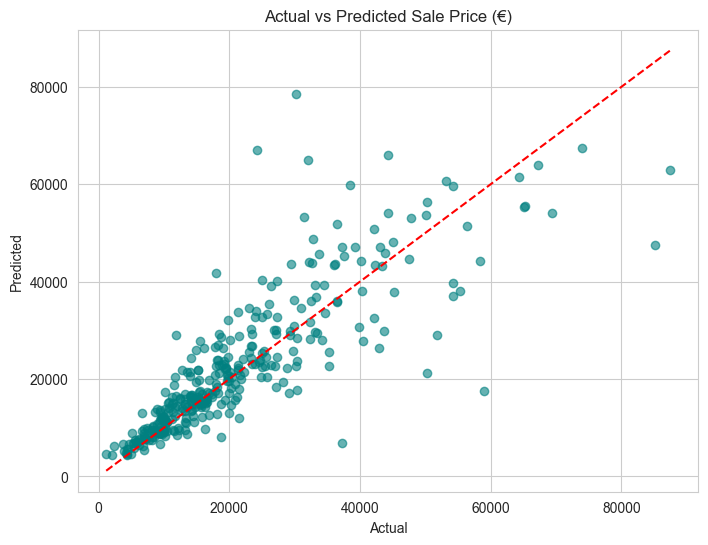

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted Sale Price (€)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


### **Model Export for Deployment**

The final model was exported using `joblib` and saved as `model.pkl`. This allows it to be integrated into a **Streamlit web application** for real-time car price prediction.

```python
joblib.dump(best_model, "../saved_models/model.pkl")


In [48]:
import joblib

joblib.dump(grid_rf.best_estimator_, "../saved_models/model.pkl")
print("Best model saved to: saved_models/model.pkl")

Best model saved to: saved_models/model.pkl
